Project 1: Various Forms of Linear Regression on Boston Housing Data

In [7]:
# The modules used
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
diabetes = datasets.load_diabetes()

In [2]:
# Load data from scikit-learn
print(diabetes.data.shape)
print(diabetes.target.shape)
data = diabetes.data
target = diabetes.target

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

(442, 10)
(442,)


In [3]:
# Using linear regression in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train_data, train_target)

# Showing intercept and coefficents
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)

# Showing errors on training dataset and testing dataset
train_pred = lr.predict(train_data)
train_error =  (np.matmul(np.subtract(train_pred,train_target).T, np.subtract(train_pred,train_target)) / (2*train_target.size)).item()
print("Training Error:", train_error)

test_pred = lr.predict(test_data)
test_error = (np.matmul(np.subtract(test_pred,test_target).T, np.subtract(test_pred,test_target)) / (2*test_target.size)).item()
print("Testing Error:", test_error)


Intercept:  [151.34565535]
Coefficients:  [[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
   518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]]
Training Error: 1434.2732921082825
Testing Error: 1450.0866439416154


In [4]:
#Implementing a function solving normal equation (formula: https://www.google.com/imgres?imgurl=https%3A%2F%2Fmedia.geeksforgeeks.org%2Fwp-content%2Fuploads%2FUntitled-drawing-1-10.png&tbnid=Wxd8nCuuwgjPLM&vet=12ahUKEwjdkabrje-BAxV5OkQIHZEKA2kQMygAegQIARBX..i&imgrefurl=https%3A%2F%2Fwww.geeksforgeeks.org%2Fml-normal-equation-in-linear-regression%2F&docid=faCTQF-NJeSViM&w=253&h=88&q=normal%20equation%20linear%20regression&ved=2ahUKEwjdkabrje-BAxV5OkQIHZEKA2kQMygAegQIARBX)
# Inputs: Training data and training label
# Output: Weights
def myNormalEqualFun(X,y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)), X.T), y)
    
# Implementing a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)


train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

#print(w)

# Showing intercept and coefficents
coeff = w[1:]
intercept = w[0]
print("Coeefficents:", coeff)
print("Intercept:", intercept)


# Showing errors on training dataset and testing dataset
def errorFinder (X,t):
    return np.matmul(np.subtract(t,X).T, np.subtract(t,X))

train_pred = myPredictFun(train_data_intercept, w)
test_pred = myPredictFun(test_data_intercept, w)


train_error = (errorFinder(train_target, train_pred) / (2* train_target.size)).item()
test_error = (errorFinder(test_target, test_pred) / (2*test_target.size) ).item()

print("Training error:",train_error )
print("Testing error:", test_error )

Coeefficents: [[  37.90031426]
 [-241.96624835]
 [ 542.42575342]
 [ 347.70830529]
 [-931.46126093]
 [ 518.04405547]
 [ 163.40353476]
 [ 275.31003837]
 [ 736.18909839]
 [  48.67112488]]
Intercept: [151.34565535]
Training error: 1434.2732921082825
Testing error: 1450.0866439416184


<h4 baisc gradient descent) to perform linear regression in the following cell</h4>

Intercept: [153.71993555]
Coefficients: [[  1.9369254 ]
 [-11.41669271]
 [ 26.30864202]
 [ 16.56567744]
 [ -6.53163543]
 [ -4.72415183]
 [ -9.38505242]
 [  7.35831616]
 [ 20.73658571]
 [  2.69177387]]
Training Mean Squared Error: 1447.3711893745353
Testing Mean Squared Error: 1442.0811992089486


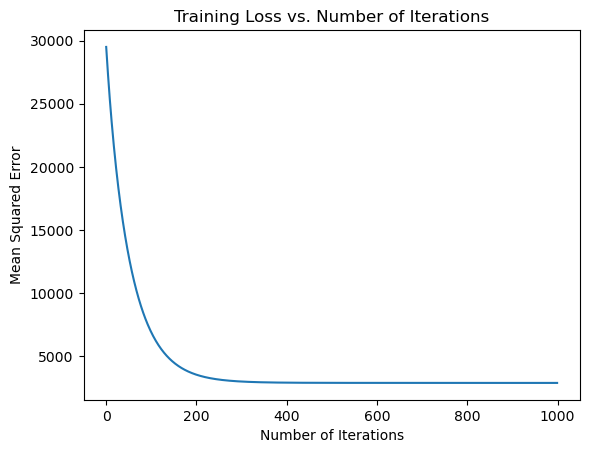

In [5]:
# Performing basic gradient descent
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Implementing a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
    
    np.random.seed(55)
    w = np.random.uniform(size=(11,1))
    loss_history =[]
    
    for i in range(numItrs):
        # Calculate predictions and error
        pred = np.matmul(X, w)
        error = np.subtract(pred, y)
        # Update weights
        grad = np.matmul(X.T, error) 
        grad= grad / X.size
        w -= learning_rate * grad
        loss_history.append(mean_squared_error(y, pred))

    return w, loss_history

# Implementing a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X,w)

train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.1,1000)
# Showing intercept and coefficents
intercept = w[0]
coefficients = w[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)


# Showing errors on training dataset and testing dataset
train_pred = myPredictFun(train_data_intercept, w)
test_pred = myPredictFun(test_data_intercept, w)

train_error = mean_squared_error(train_target, train_pred) /2
test_error = mean_squared_error(test_target, test_pred) /2

print("Training Mean Squared Error:", train_error)
print("Testing Mean Squared Error:", test_error)


# Plotting learning curves showing training errors and testing errors along iterations
plt.plot(range(1000), loss)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss vs. Number of Iterations')
plt.show()

Intercept: 153.21390841117693
Coefficients: [ 33.4146164  -59.2761783  193.47745772 131.41202957 -20.50974544
 -36.18378764 -84.3011875   47.65337789 135.37290031  65.97227979]
Training error:  106197.13687663992
Testing error:  101474.3556668622


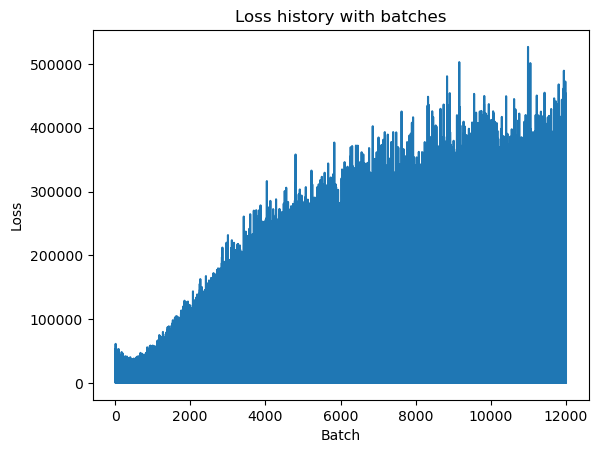

In [6]:
# Performing stochastic gradient descent
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Implementing a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
    m, n = X.shape
    w = np.zeros(n)
    loss_history = []

    for epoch in range(epoches):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batchsize):
            X_i = X[i:i+batchsize]
            y_i = y[i:i+batchsize]

            pred = np.matmul(X_i, w)
            error = pred - y_i
            grad = np.matmul(X_i.T, error) 
            grad = grad.mean(axis=1) 
            grad /= X_i.shape[0]
            w -= learning_rate * grad
            
            loss = np.sum((error) ** 2) / (2*m)
            loss_history.append(loss)

    return w, loss_history

# Implementing a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X,w)

train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0.001,1000,32)

# Showing intercept and coefficents
intercept = w[0]
coefficients = w[1:]
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Showing errors on training dataset and testing dataset
train_pred = myPredictFun(train_data_intercept, w)
test_pred = myPredictFun(test_data_intercept, w)
train_error = 0.5 * np.mean((train_pred - train_target) ** 2)
test_error = 0.5 * np.mean((test_pred - test_target) ** 2)
print("Training error: ", train_error)
print("Testing error: ", test_error)

# Task 4-5: plot learning curves showing training errors and testing errors along batches
plt.figure()
plt.plot(range(len(loss)), loss)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss history with batches')
plt.show()